In [ ]:
#安装ChatGLM
!pip install protobuf
!pip install transformers==4.30.2
!pip install cpm_kernels
!pip install torch>=2.0
!pip install gradio
!pip install mdtex2html
!pip install sentencepiece
!pip install accelerate
!pip install sse-starlette
!pip install streamlit>=1.24.0

#finetune
!pip install -U accelerate
!pip install datasets
!pip install -U peft
!pip install -U torchkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.6/416.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:

In [ ]:
from transformers import  AutoModel,AutoTokenizer
model_name = 'THUDM/chatglm2-6b'
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
# 这里将模型转化成了半精度FP16模式，可以显存优化，可以减少模型在GPU上的显存使用量，但可能会牺牲一定的精度
# 如果你希望使用更高的精度，同时你有足够好的GPU你可以移除这个函数的调用
model = AutoModel.from_pretrained(model_name,trust_remote_code=True).half().cuda()

A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- tokenization_chatglm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- configuration_chatglm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- quantization.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/THUDM/chatglm2-6b:
- modeling_chatglm.py
- quantization.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# define a basic prompt for express comment
# prompt template with 3shots ahead

prompt = """文本分类任务：将一段网络中流传的文本进行谣言分类，分为：'确实如此'，'尚无定论'，'伪科学'，'伪常识' 上述四类中的一种。

下面是一些范例:

A型血更易感染新冠肺炎，O型血不易感 -> 尚未定论
日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒  -> 伪科学
美国总统特朗普建议：喝消毒水杀灭体内的新冠病毒 -> 伪常识

请对下述评论进行分类。返回'确实如此'，'尚无定论'，'伪科学'，'伪常识' 中的一类，无需其它说明和解释。

xxxxxx ->

"""

# replace query with real content

def get_prompt(text):
    return prompt.replace('xxxxxx',text)

In [ ]:
# try for once and test model workable
response, his = model.chat(tokenizer, get_prompt('戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格'), history=[])
print(response)
print(his)

尚无定论
[("文本分类任务：将一段网络中流传的文本进行谣言分类，分为：'确实如此'，'尚无定论'，'伪科学'，'伪常识' 上述四类中的一种。\n\n下面是一些范例:\n\nA型血更易感染新冠肺炎，O型血不易感 -> 尚未定论\n日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒  -> 伪科学\n美国总统特朗普建议：喝消毒水杀灭体内的新冠病毒 -> 伪常识\n\n请对下述评论进行分类。返回'确实如此'，'尚无定论'，'伪科学'，'伪常识' 中的一类，无需其它说明和解释。\n\n戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格 ->\n\n", '尚无定论')]


In [ ]:
# add new history comment as new shots
his.append(("合格的口罩会吸附大量纸屑，反之就是不合格的口罩 -> ","伪科学"))
his.append(("抗病毒药阿昔洛韦能有效预防新冠肺炎 -> ","伪科学"))
his.append(("新冠病毒能在康复者体内存留数周但传染力变弱 -> ","尚未定论"))
# now we got 6 shots
print(his)

[("文本分类任务：将一段网络中流传的文本进行谣言分类，分为：'确实如此'，'尚无定论'，'伪科学'，'伪常识' 上述四类中的一种。\n\n下面是一些范例:\n\nA型血更易感染新冠肺炎，O型血不易感 -> 尚未定论\n日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒  -> 伪科学\n美国总统特朗普建议：喝消毒水杀灭体内的新冠病毒 -> 伪常识\n\n请对下述评论进行分类。返回'确实如此'，'尚无定论'，'伪科学'，'伪常识' 中的一类，无需其它说明和解释。\n\n戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格 ->\n\n", '尚无定论'), ('合格的口罩会吸附大量纸屑，反之就是不合格的口罩 -> ', '伪科学'), ('抗病毒药阿昔洛韦能有效预防新冠肺炎 -> ', '伪科学'), ('新冠病毒能在康复者体内存留数周但传染力变弱 -> ', '尚未定论')]


In [ ]:
# based on new shots to make prediction
response, his = model.chat(tokenizer, "新冠肺炎患者的母乳中有新冠病毒 -> ", history=his)
print(response) # ground truth 为 尚无定论 判断正确

response, his = model.chat(tokenizer, "新冠病毒会在夏季自行消失 -> ", history=his)
print(response)  # ground truth 为 尚无定论 判断正确

response, his = model.chat(tokenizer, "宠物狗会传播新型冠状病毒 -> ", history=his)
print(response)  # ground truth 为 尚无定论 判断错误

尚无定论
尚无定论
确如此


In [ ]:
# define a function for above
# only return prediction result rather than result & history
def predict(text):
    response, history = model.chat(tokenizer, f"{text} ->", history=his,
    temperature=0.01)
    return response

predict('花岗岩能预防新冠肺炎感染') # try for once and got a incompatiable result
# ground truth 为尚无定论 判断错误

'尚无定论'

In [ ]:
import pandas as pd
import numpy as np
import datasets

df = pd.read_csv("/content/drive/MyDrive/Rumor_Datasets/fact.csv")
df.head()

,date,explain,tag,abstract,title,rumor
0,2020-03-18,尚无定论,"['新型冠状病毒', '易感人群']",研究没有正式发表，没有经过同行评议，所以不应被视为结论性的、指导临床实践/健康相关行为的信息...,A型血更易感染新冠肺炎，O型血不易感,南方科技大学、上海交大、武汉中南医院、武汉金银潭医院等8家单位的最新研究显示：A、B、O、A...
1,2020-03-16,伪科学,"['新型冠状病毒', '传染病']",我们常见的疾病，比如感冒、流感、病毒性肺炎主要是通过咳嗽、喷嚏以及空气播散的飞沫在人际间传播...,日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒,日本医生在治疗COVID-19病例时给予的绝妙建议： 每个人都应确保您的口腔和咽喉湿润，永不...
2,2020-03-12,伪科学,"['口罩', '蜡烛']",口罩的种类繁多。一部分对于防护性能要求较高的口罩，比如N95、N99等，为了保证防护性，往往...,戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格,戴口罩可以吹灭火苗，说明口罩不合格，是真的吗？——来自较真用户@疯星星提问
3,2020-03-11,伪科学,"['口罩', '吸附纸屑']",在结构完整的情况下，口罩能吸附大量纸屑，主要是靠外层的纺粘布实现的。但真口罩和假口罩最核心的...,合格的口罩会吸附大量纸屑，反之就是不合格的口罩,网上说口罩能吸附小纸片就是合格口罩是吗——来自较真用户@倩的提问。
4,2020-03-10,伪科学,"['新型冠状病毒', '阿昔洛韦']",阿昔洛韦是1977年由Elion等人首次设计并合成的无环核苷类似物，并于1981年上市，此后...,抗病毒药阿昔洛韦能有效预防新冠肺炎,网传阿昔洛韦这一款抗病毒药可以有效预防新型冠状病毒肺炎。


In [ ]:
print(df['explain'].value_counts())

伪科学     61
尚无定论    43
确实如此    19
伪常识      1
Name: explain, dtype: int64


- 数据的分布存在较大的失衡
- 需要对数据进行更多的平衡处理
  - 爬取更多的数据
  - 基于当前数据进行筛选（不推荐）

In [ ]:
# 移除无用数据

df = df.drop(columns=['date', 'tag','abstract','rumor'])
df.head()


,explain,title
0,尚无定论,A型血更易感染新冠肺炎，O型血不易感
1,伪科学,日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒
2,伪科学,戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格
3,伪科学,合格的口罩会吸附大量纸屑，反之就是不合格的口罩
4,伪科学,抗病毒药阿昔洛韦能有效预防新冠肺炎


In [ ]:
print(len(df))

124


In [ ]:
# 将Pandas DataFrame对象转换为Hugging Face Dataset对象
# 将数据集划分为训练集和测试集
# 数据集还是太小了，容易产生过拟合
# test_size: 指定测试集的大小。在这个例子中，测试集的大小是31，这意味着31个样本将被用于测试集
# 已知完整的数据集一共包括124个案例，因此有93个训练集
# shuffle: 如果设置为True，数据集在划分之前会被打乱，可以确保训练集和测试集是随机抽样的，从而避免因样本排序引起的偏差
# seed: 设置随机数生成器的种子，用于控制随机打乱的过程，确保结果是可复制的。在这里，种子被设置为43，你也可以设置为其他的数字
ds_dic = datasets.Dataset.from_pandas(df).train_test_split(
    test_size = 31,shuffle=True, seed = 43)
dftrain = ds_dic['train'].to_pandas() # 将训练集转化为pandas
dftest = ds_dic['test'].to_pandas() # 将验证集转化为pandas
# 用于将DataFrame对象保存为Parquet格式的文件
dftrain.to_parquet('dftrain.parquet')
dftest.to_parquet('dftest.parquet')

In [ ]:
preds = ['' for x in dftest['explain']] # 基于测试集的长度创建一个新的数组，用于存储测试的结果
print(len(preds))

31


In [ ]:
dftest['pred'] = preds
dftest.head()

,explain,title,pred
0,确实如此,新型冠状病毒肺炎十大谣言榜,
1,伪科学,钟南山院士建议盐水漱口防病毒,
2,伪科学,用了7天的N95口罩用吹风机吹或酒精消毒可继续用,
3,伪科学,花菇中的多糖能增强人体免疫力，对抗新型冠状病毒,
4,确实如此,大部分新型肺炎患者只需2-4周就可被治愈,


In [ ]:
# 对dftest中的每一行文本进行预测，然后把预测结果存储在preds列表中
# 使用当前的未经过ft的模型进行评论类型的预测
from tqdm import tqdm
for i in tqdm(range(len(dftest))):
    text = dftest['title'].loc[i]
    preds[i] = predict(text)

100%|██████████| 31/31 [00:09<00:00,  3.14it/s]


In [ ]:
dftest['pred'] = preds
dftest.head()

,explain,title,pred
0,确实如此,新型冠状病毒肺炎十大谣言榜,1. 已经证实新冠病毒可以在治愈患者体内持续数周并传染其他人。\n2. 新冠病毒可以通过宠物...
1,伪科学,钟南山院士建议盐水漱口防病毒,尚无定论
2,伪科学,用了7天的N95口罩用吹风机吹或酒精消毒可继续用,尚无定论
3,伪科学,花菇中的多糖能增强人体免疫力，对抗新型冠状病毒,尚无定论
4,确实如此,大部分新型肺炎患者只需2-4周就可被治愈,尚无定论


In [ ]:
# 创建 dftest 的数据透视表
# index='explain': 将'dftest'数据集的'explain'列设置为透视表的索引（行标签）
# columns='pred': 将数据集的'pred'列设置为透视表的列标签
# values='explain': 将数据集的'explain'列的值填充到透视表中。一般来说，我们会选择一个需要进行计算的列作为values
# aggfunc='count': 聚合函数，定义了我们如何对values进行计算。在这里，我们选择的是'count'，意味着我们要对'text'列的值进行计数
dftest.pivot_table(index='explain',columns = 'pred',values='title',aggfunc='count')

pred,1. 已经证实新冠病毒可以在治愈患者体内持续数周并传染其他人。\n2. 新冠病毒可以通过宠物狗传播。\n3. 出门戴口罩可以防止病毒感染。\n4. 避免人群聚集可以有效预防新冠病毒的传播。\n5. 经常洗手可以防止新冠病毒感染。\n6. 给患者使用抗病毒药物可以预防新冠病毒感染。\n7. 新冠病毒会在夏季自行消失。\n8. 新冠病毒可以通过空气中的飞沫传播。\n9. 新冠病毒可以通过煮熟的鸡蛋传播。\n10. 新冠病毒可以通过喝消毒水来预防感染。,伪科学,尚无定论,确如此,确实如此
explain,,,,,
伪科学,NaN,2.0,14.0,NaN,NaN
尚无定论,NaN,NaN,7.0,3.0,NaN
确实如此,1.0,NaN,3.0,NaN,1.0


In [ ]:
acc = len(dftest.query('explain==pred'))/len(dftest) # 没有经过ft的model的accuracy为45%, 分数是很低的
print('accuracy=',acc)

accuracy= 0.3225806451612903


In [ ]:
# 加载数据
import pandas as pd
import numpy as np
import datasets

dftrain = pd.read_parquet('dftrain.parquet')
dftest = pd.read_parquet('dftest.parquet')

In [ ]:
dftrain.head()

,explain,title
0,伪科学,乳铁蛋白能预防新型冠状病毒
1,尚无定论,新冠病毒能在康复者体内存留数周但传染力变弱
2,尚无定论,中草药洗液“洁尔阴”预防非典是良方
3,确实如此,中央空调存在传播新型冠状病毒的可能性
4,确实如此,使用酒精消毒，别往空气中喷，也别随便往自己身上喷


In [ ]:
dftest.head()

,explain,title,pred
0,确实如此,新型冠状病毒肺炎十大谣言榜,1. 已经证实新冠病毒可以在治愈患者体内持续数周并传染其他人。\n2. 新冠病毒可以通过宠物...
1,伪科学,钟南山院士建议盐水漱口防病毒,尚无定论
2,伪科学,用了7天的N95口罩用吹风机吹或酒精消毒可继续用,尚无定论
3,伪科学,花菇中的多糖能增强人体免疫力，对抗新型冠状病毒,尚无定论
4,确实如此,大部分新型肺炎患者只需2-4周就可被治愈,尚无定论


In [ ]:
dftrain['explain'].value_counts()

伪科学     45
尚无定论    33
确实如此    14
伪常识      1
Name: explain, dtype: int64

In [ ]:
# 将上下文整理成与推理时候一致，参照model.chat中的源码
def build_inputs(query, history):
    prompt = ""
    for i, (old_query, response) in enumerate(history):
        prompt += "[Round {}]\n\n问：{}\n\n答：{}\n\n".format(i + 1, old_query, response) # history中的第几轮次，问了什么，得到了什么答案
    prompt += "[Round {}]\n\n问：{} -> \n\n答：".format(len(history) + 1, query) # 当前轮次，当前问话
    return prompt

In [ ]:
print(build_inputs('服用杀虫剂可以杀灭新冠病毒',history=his))

[Round 1]

问：文本分类任务：将一段网络中流传的文本进行谣言分类，分为：'确实如此'，'尚无定论'，'伪科学'，'伪常识' 上述四类中的一种。

下面是一些范例:

A型血更易感染新冠肺炎，O型血不易感 -> 尚未定论
日本医生建议：大量喝水保持喉咙湿润，预防新冠病毒  -> 伪科学
美国总统特朗普建议：喝消毒水杀灭体内的新冠病毒 -> 伪常识

请对下述评论进行分类。返回'确实如此'，'尚无定论'，'伪科学'，'伪常识' 中的一类，无需其它说明和解释。

戴口罩可以吹灭蜡烛打火机火苗，说明口罩不合格 ->



答：尚无定论

[Round 2]

问：合格的口罩会吸附大量纸屑，反之就是不合格的口罩 -> 

答：伪科学

[Round 3]

问：抗病毒药阿昔洛韦能有效预防新冠肺炎 -> 

答：伪科学

[Round 4]

问：新冠病毒能在康复者体内存留数周但传染力变弱 -> 

答：尚未定论

[Round 5]

问：新冠肺炎患者的母乳中有新冠病毒 -> 

答：尚无定论

[Round 6]

问：新冠病毒会在夏季自行消失 -> 

答：尚无定论

[Round 7]

问：宠物狗会传播新型冠状病毒 -> 

答：确如此

[Round 8]

问：服用杀虫剂可以杀灭新冠病毒 -> 

答：


In [ ]:
dftrain['context'] = [build_inputs(x,history=his) for x in dftrain['title']] # 定义训练集中的上文
dftrain['target'] = [x for x in dftrain['explain']] # 定义训练集中的标签
dftrain = dftrain[['context','target']]

dftest['context'] = [build_inputs(x,history=his) for x in dftest['title']]
dftest['target'] = [x for x in dftest['explain']]
dftest = dftest[['context','target']]

In [ ]:
# 将pandas的dataset转化为hf的dataset
ds_train = datasets.Dataset.from_pandas(dftrain)
ds_val = datasets.Dataset.from_pandas(dftest)

In [ ]:
ds_train

Dataset({
    features: ['context', 'target'],
    num_rows: 93
})

- 将数据集进行Tokenizer

In [ ]:
# 将输入的文本转化为token也就是Tokenizer
# context转化成context_ids，把target转化成target_ids
# 将context_ids和target_ids拼接到一起作为模型的input_ids

from tqdm import tqdm
import transformers

model_name = "THUDM/chatglm2-6b"
max_seq_length = 512
skip_over_length = True

# 载入模型的Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
# 载入模型的参数
config = transformers.AutoConfig.from_pretrained(model_name, trust_remote_code=True, device_map='auto')
# 定义预处理流程
def preprocess(example):
    context = example["context"]
    target = example["target"]
    # 将context转化为id 超长就截取
    context_ids = tokenizer.encode(
            context,
            max_length=max_seq_length,
            truncation=True)
    # 将target也转化为id
    target_ids = tokenizer.encode(
        target,
        max_length=max_seq_length,
        truncation=True,
        add_special_tokens=False)
    # 将上述两者的id拼接 + 配置文件中end of sentence 的id
    input_ids = context_ids + target_ids + [config.eos_token_id]
    # -100标志位后面会在计算loss时会被忽略不贡献损失，我们集中优化target部分生成的loss
    labels = [-100]*len(context_ids)+ target_ids + [config.eos_token_id]

    return {"input_ids": input_ids,
            "labels": labels,
            "context_len": len(context_ids),
            'target_len':len(target_ids)+1}


In [ ]:
ds_train_token = ds_train.map(preprocess).select_columns(['input_ids','labels', 'context_len','target_len'])
if skip_over_length:
    ds_train_token = ds_train_token.filter(
        lambda example: example["context_len"]<max_seq_length and example["target_len"]<max_seq_length)

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Filter:   0%|          | 0/93 [00:00<?, ? examples/s]

In [ ]:
ds_val_token = ds_val.map(preprocess).select_columns(['input_ids', 'labels','context_len','target_len'])
if skip_over_length:
    ds_val_token = ds_val_token.filter(
        lambda example: example["context_len"]<max_seq_length and example["target_len"]<max_seq_length)

Map:   0%|          | 0/31 [00:00<?, ? examples/s]

Filter:   0%|          | 0/31 [00:00<?, ? examples/s]

- 管道构建

In [ ]:
import torch

def data_collator(examples: list):
    len_ids = [len(example["input_ids"]) for example in examples]
    longest = max(len_ids) #之后按照batch中最长的input_ids进行padding

    input_ids = []
    labels_list = []

    for length, example in sorted(zip(len_ids, examples), key=lambda x: -x[0]):
        ids = example["input_ids"]
        labs = example["labels"]

        ids = ids + [tokenizer.pad_token_id] * (longest - length)
        labs = labs + [-100] * (longest - length)

        input_ids.append(torch.LongTensor(ids))
        labels_list.append(torch.LongTensor(labs))

    input_ids = torch.stack(input_ids)
    labels = torch.stack(labels_list)
    return {
        "input_ids": input_ids,
        "labels": labels,
    }

In [ ]:
dl_train = torch.utils.data.DataLoader(ds_train_token,num_workers=2,batch_size=4,
                                       pin_memory=True,shuffle=True,
                                       collate_fn = data_collator)
dl_val = torch.utils.data.DataLoader(ds_val_token,num_workers=2,batch_size=4,
                                    pin_memory=True,shuffle=True,
                                     collate_fn = data_collator)

In [ ]:
for batch in dl_train:
    break

In [ ]:
batch

{'input_ids': tensor([[64790, 64792,   790,  ..., 56857, 31760,     2],
         [64790, 64792,   790,  ...,     0,     0,     0],
         [64790, 64792,   790,  ...,     0,     0,     0],
         [64790, 64792,   790,  ...,     0,     0,     0]]),
 'labels': tensor([[ -100,  -100,  -100,  ..., 56857, 31760,     2],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
         [ -100,  -100,  -100,  ...,  -100,  -100,  -100]])}

In [ ]:
dl_train.size = 10 #用约300个step做一次验证

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# 检查设备后开始训练
# for colab tricky issue
# https://github.com/googlecolab/colabtools/issues/3409
!nvidia-smi

Sun Jul 30 01:57:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    50W / 400W |  30213MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- 定义模型

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from transformers import AutoTokenizer, AutoModel, TrainingArguments, AutoConfig
import torch
import torch.nn as nn
from peft import get_peft_model, LoraConfig, TaskType

# 加载ChatGLM2-6B模型并不以8bit的精度载入
model = AutoModel.from_pretrained("THUDM/chatglm2-6b",
                                  load_in_8bit=False,
                                  trust_remote_code=True)

model.supports_gradient_checkpointing = True  #节约cuda，但可能会使得训练时间变长
model.gradient_checkpointing_enable() # 作用同上
model.enable_input_require_grads() # 作用同上

model.config.use_cache = False  # 关闭了模型的缓存机制，该设置可以避免一些警告，但在模型推理时需要重新开启

# 配置LORA模型的类
# 常规LM任务
# 非推理模式
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM, inference_mode=False,
    r=8,
    lora_alpha=32, lora_dropout=0.1,
)

# 结合Lora和原有模型
model = get_peft_model(model, peft_config)
# 开启模型的并行处理能力，这可以在有多个GPU的情况下提高训练效率
model.is_parallelizable = True
model.model_parallel = True
# 打印出模型的可训练参数
model.print_trainable_parameters()
# 可训练参数：1949696
# 总参数量：6245533696
# 需要调整的模型参数量的占比还是很低的 3.1%

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

trainable params: 1,949,696 || all params: 6,245,533,696 || trainable%: 0.031217444255383614


In [ ]:
from torchkeras import KerasModel
from accelerate import Accelerator
# 重写了torchkeras中的StepRunner类
class StepRunner:
    def __init__(self, net, loss_fn, accelerator=None, stage = "train", metrics_dict = None,
                 optimizer = None, lr_scheduler = None
                 ):
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler
        self.accelerator = accelerator if accelerator is not None else Accelerator()
        if self.stage=='train':
            self.net.train()
        else:
            self.net.eval()

    def __call__(self, batch):

        # 计算loss
        with self.accelerator.autocast():
            # 通过模型self.net对输入数据进行预测，然后用预测结果和标签计算损失, loss的计算过程直接交给ChatGLM2了吗？
            loss = self.net(input_ids=batch["input_ids"],labels=batch["labels"]).loss

        # 执行梯度下降的步骤
        if self.optimizer is not None and self.stage=="train":
            # 计算每个模型参数关于损失的梯度
            self.accelerator.backward(loss)
            # 执行梯度裁剪（self.accelerator.clip_grad_norm_），防止梯度爆炸
            if self.accelerator.sync_gradients:
                self.accelerator.clip_grad_norm_(self.net.parameters(), 1.0)
            # 更新模型参数
            self.optimizer.step()
            # 存在学习率调整器，就调整学习率
            if self.lr_scheduler is not None:
                self.lr_scheduler.step()
            # 清空梯度
            self.optimizer.zero_grad()

        # 给并行计算和多GPU计算的损失收集起来并求和
        all_loss = self.accelerator.gather(loss).sum()

        # losses (or plain metrics that can be averaged)
        step_losses = {self.stage+"_loss":all_loss.item()}

        # metrics (stateful metrics)
        step_metrics = {}

        # 记录过程信息，追踪模型性能用
        if self.stage=="train":
            if self.optimizer is not None:
                step_metrics['lr'] = self.optimizer.state_dict()['param_groups'][0]['lr']
            else:
                step_metrics['lr'] = 0.0
        return step_losses,step_metrics

KerasModel.StepRunner = StepRunner

# 仅仅保存lora可训练参数
# 覆盖了KerasModel中的load_ckpt和save_ckpt方法
def save_ckpt(self, ckpt_path='checkpoint.pt', accelerator = None):
    unwrap_net = accelerator.unwrap_model(self.net)
    unwrap_net.save_pretrained(ckpt_path)

def load_ckpt(self, ckpt_path='checkpoint.pt'):
    self.net = self.net.from_pretrained(self.net,ckpt_path)
    self.from_scratch = False

KerasModel.save_ckpt = save_ckpt
KerasModel.load_ckpt = load_ckpt


In [ ]:
# 定义模型的训练
# 没有损失函数
# 优化器是adamW
# 学习率 2e-6
# 模型参数存储路径
keras_model = KerasModel(model,loss_fn = None,
        optimizer=torch.optim.AdamW(model.parameters(),lr=2e-6))
ckpt_path = 'medical_rumor_chatglm2_v1'

<<<<<< ⚡️ cuda is used >>>>>>


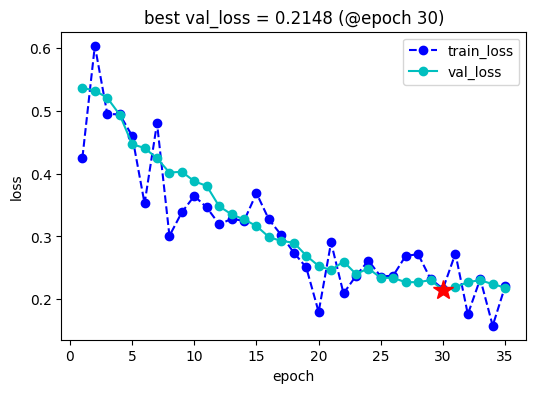

<<<<<< val_loss without improvement in 5 epoch,early stopping >>>>>>


,epoch,train_loss,lr,val_loss
0,1,0.425275,0.000002,0.536247
1,2,0.603394,0.000002,0.532150
2,3,0.494995,0.000002,0.520462
3,4,0.494098,0.000002,0.493683
4,5,0.460132,0.000002,0.446823
5,6,0.352539,0.000002,0.440712
6,7,0.480127,0.000002,0.424316
7,8,0.301019,0.000002,0.401703
8,9,0.338586,0.000002,0.402962
9,10,0.364420,0.000002,0.387779


In [ ]:
# 训练一百轮
# patience=5：早停策略的参数，用于防止模型在训练过程中过拟合。如果在连续的5轮训练中，验证损失（或者其他的指定指标）都没有改善，那么训练将会提前停止
# monitor='val_loss'：需要监控的指标：验证损失
# mode='min'：早停策略的参数，指定了改进的方向。'min'意味着指标（这里是验证损失）的最小值被视为改进
# mixed_precision='fp16'：这是一种混合精度训练的策略。在混合精度训练中，一部分张量的数据类型会被设为低精度（如半精度浮点数fp16），这样可以减少计算资源的需求，从而提高训练速度和效率
keras_model.fit(train_data = dl_train,
                val_data = dl_val,
                epochs=100,patience=5,
                monitor='val_loss',mode='min',
                ckpt_path = ckpt_path,
                mixed_precision='fp16'
               )

- 验证模型的效果

In [ ]:
from peft import PeftModel
model = AutoModel.from_pretrained("THUDM/chatglm2-6b",
                                  load_in_8bit=False,
                                  trust_remote_code=True,
                                  device_map='auto')
model = PeftModel.from_pretrained(model,ckpt_path)
model = model.merge_and_unload() #合并lora权重

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
predict('服用老鼠药可以治疗艾滋病')

'伪科学'

In [ ]:
dftest = pd.read_parquet('dftest.parquet')
preds = ['' for x in dftest['title']]
# 重新走一遍对测试数据的验证流程
from tqdm import tqdm
for i in tqdm(range(len(dftest))):
    text = dftest['title'].loc[i]
    preds[i] = predict(text)

100%|██████████| 31/31 [00:12<00:00,  2.49it/s]


In [ ]:
dftest['pred'] = preds
dftest.pivot_table(index='explain',columns = 'pred',values='title',aggfunc='count')
acc = len(dftest.query('explain==pred'))/len(dftest)
print('acc=',acc)


acc= 0.6129032258064516


In [ ]:
predict('疫情期间可以通过大强度锻炼提高抵抗力')

'尚无定论'